In [4]:
library(ggplot2)
library(gridExtra)
library(reshape2)
library(GGally)
# library (tidyr)

In [5]:
df_fb <- read.csv("C:/Users/kgtrm/Documents/R projects data/pseudo_facebook.tsv", sep = "\t")

In [6]:
# rewriting some factor data
df_fb$dob_month <- as.factor(df_fb$dob_month)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



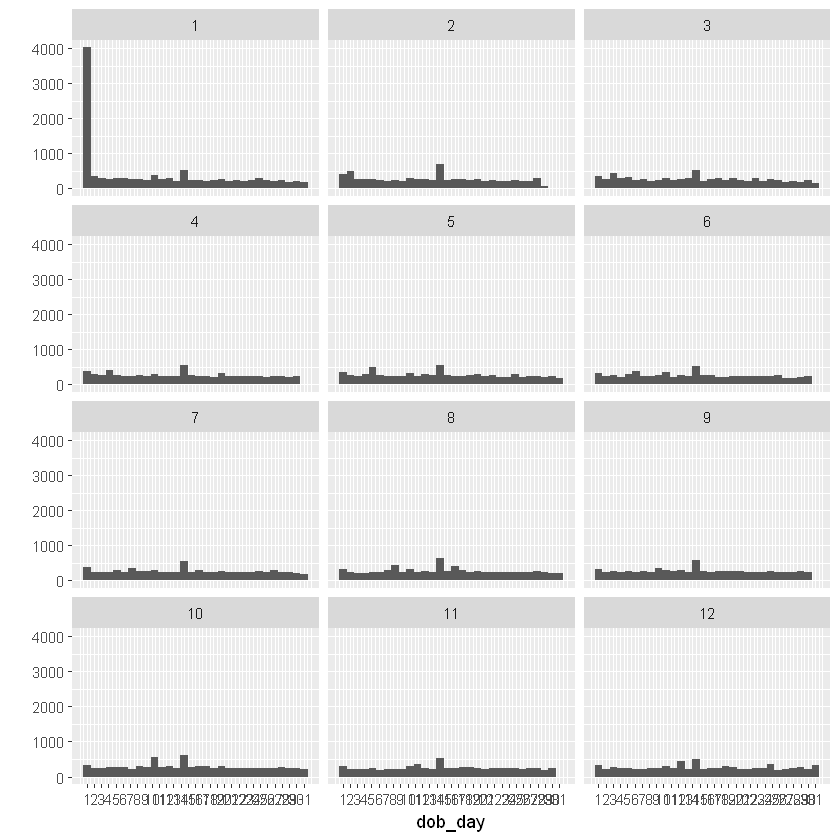

In [7]:
# histograms of birthdays. something weird in january
qplot(x = dob_day, data = df_fb) +
    scale_x_continuous(breaks = 1:31) +
    facet_wrap(~dob_month, ncol = 3)

Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


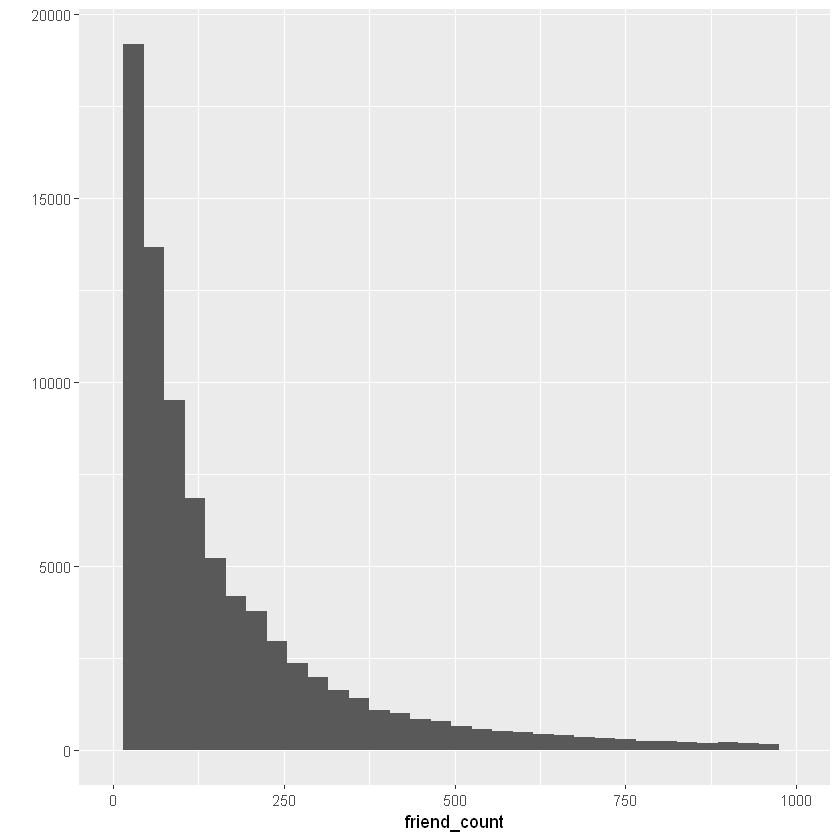

In [8]:
# histogram of friend count
qplot(x = friend_count, data = df_fb, binwidth = 30, xlim = c(0, 1000))

Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 6 rows containing missing values (geom_bar)."
Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 6 rows containing missing values (geom_bar)."


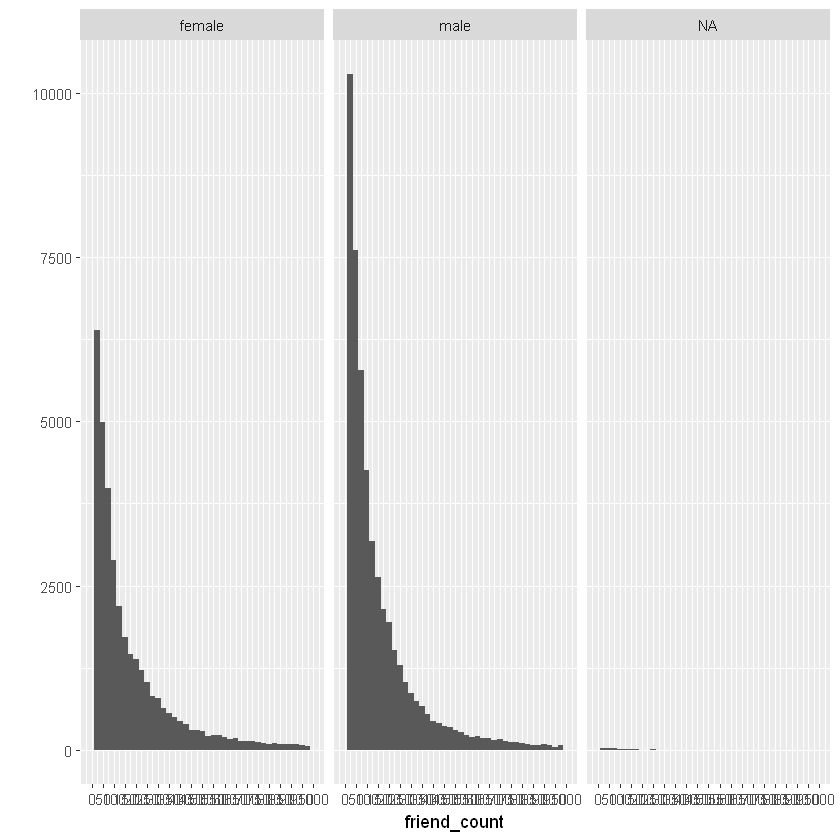

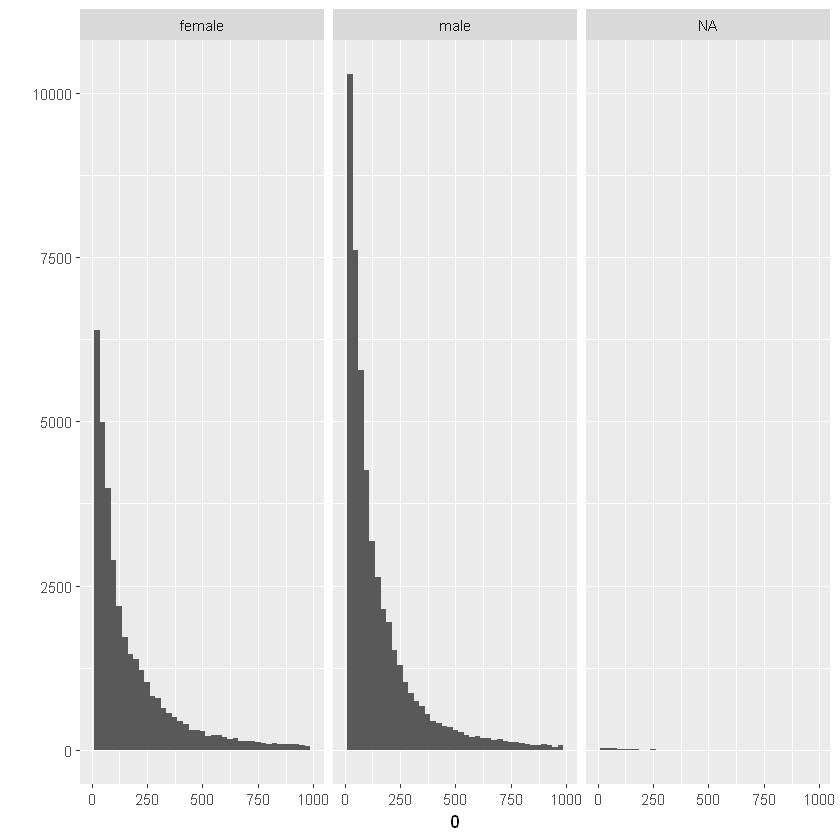

In [9]:
# friend count, faceted by gender
qplot(x = friend_count, data = df_fb, binwidth = 25) +
    scale_x_continuous(limit = c(0, 1000), breaks = seq(0, 1000, 50)) +
    facet_wrap(~gender)

# same data but with limits on x to make the axis values nicer
qplot(x = friend_count, data = df_fb, xlim = c(0, 1000),
     xlab = seq(0, 1000, 50), binwidth = 25) +
    facet_wrap(~gender)

Warning message:
"Removed 26 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 26 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


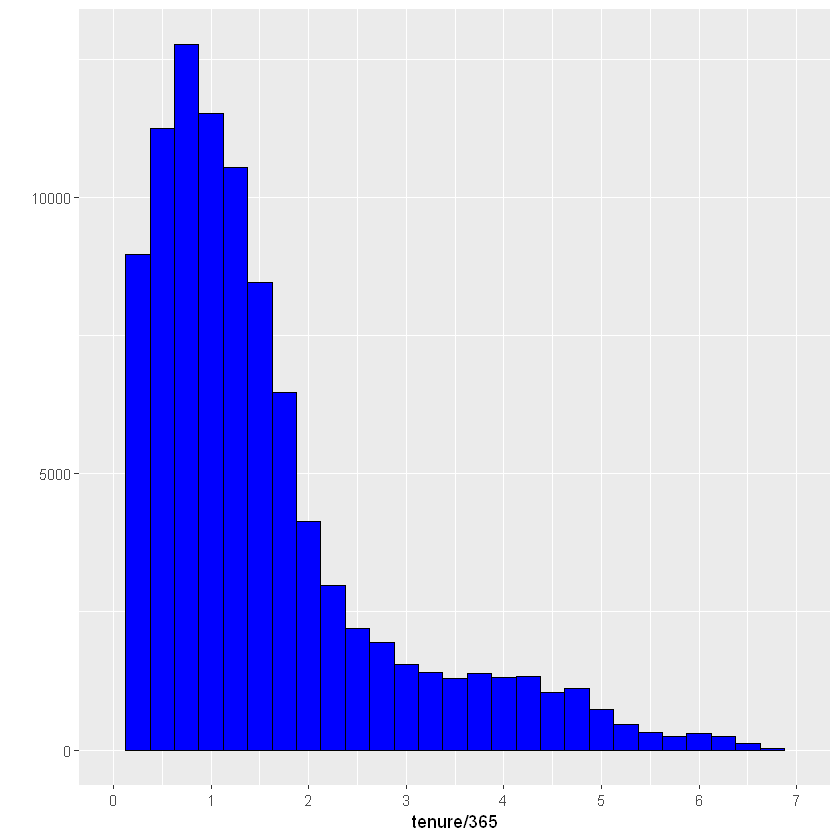

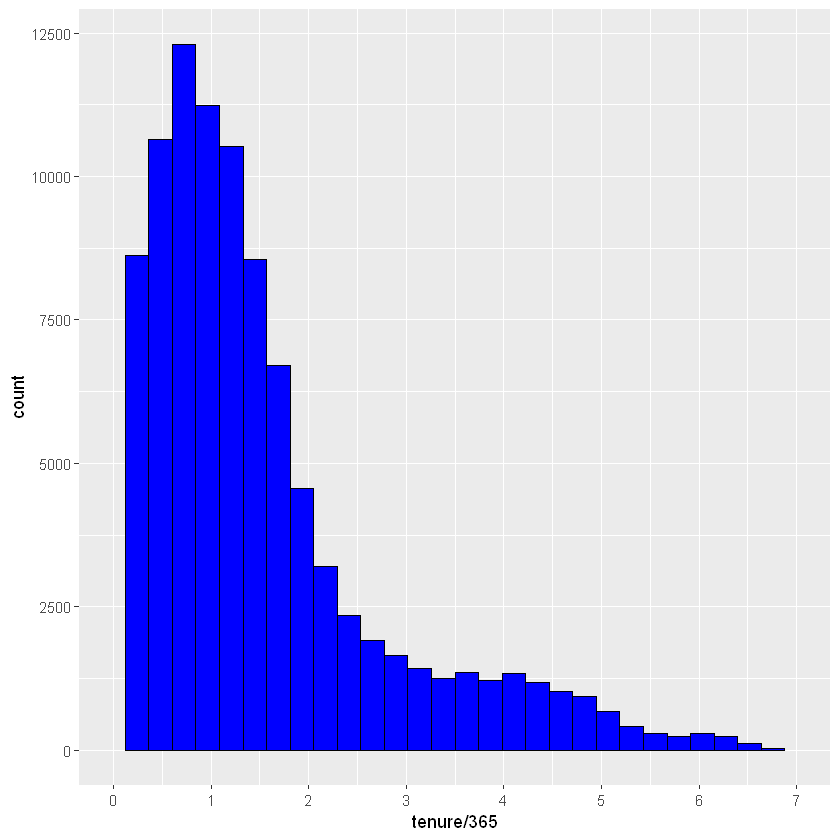

In [10]:
# histogram of tenure on facebook
# tenure is number of days, so tenure/365 is number of years
qplot(x = tenure/365, data = df_fb, binwidth = 0.25,
      color = I("black"), fill = I("#0000FF")) +
    scale_x_continuous(breaks = seq(0, 7, 1), limits = c(0, 7))

# my attempt with ggplot (basically the same)
ggplot(aes(x = tenure/365, fill = I("#0000FF"), color = I("black")), data = df_fb, binwidth = 0.25) +
    geom_histogram() +
    scale_x_continuous(limits = c(0, 7), breaks = seq(0, 7, 1))

Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 24146 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


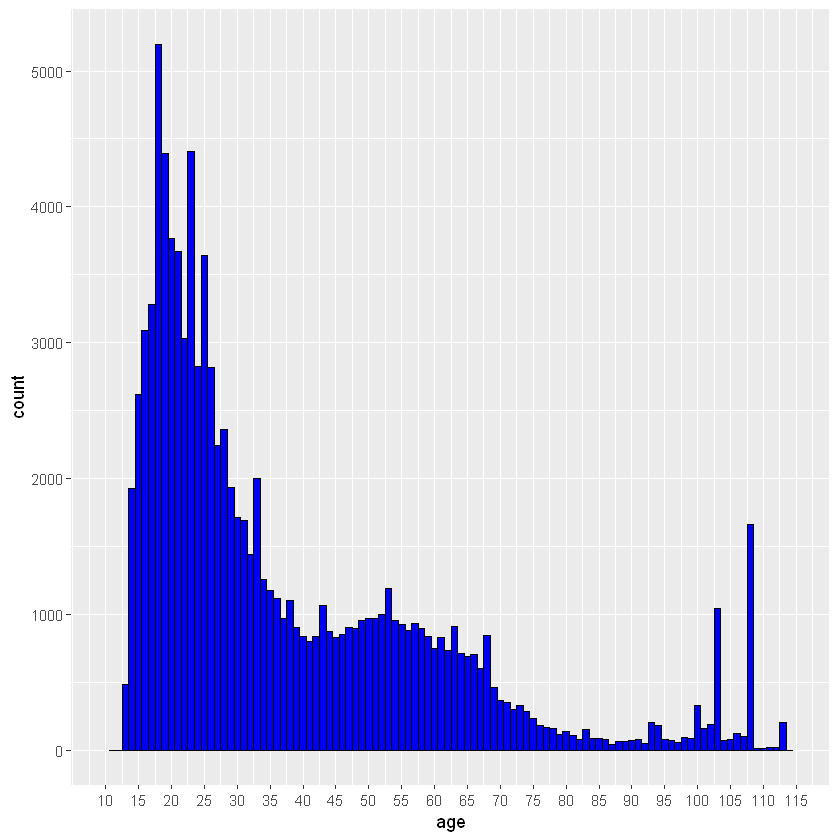

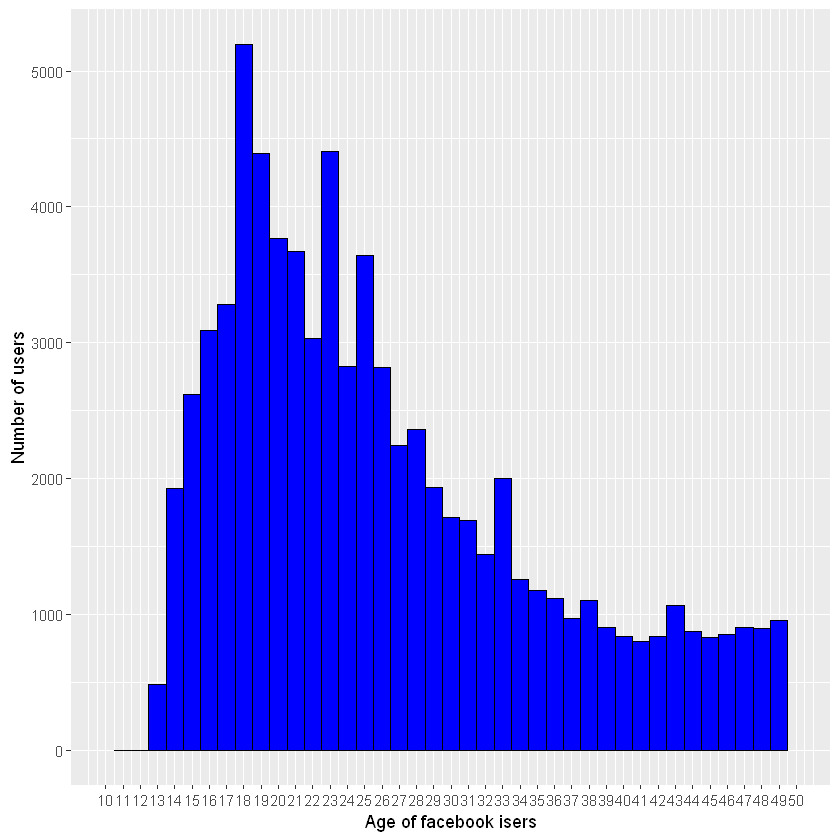

In [11]:
# histogram of ages of all facebook users
# attempt with ggplot
ggplot(aes(x = age, color = I("black"), fill = I("#0000F0")), data = df_fb) +
    geom_histogram(binwidth = 1) +
    scale_x_continuous(limits = c(10, 115), breaks = seq(10, 115, 5))

# theirs
qplot(x = age, data = df_fb, binwidth = 1,
     xlab = "Age of facebook isers",
     ylab = "Number of users", 
     color = I("black"), fill = I("#0000FF")) +
    scale_x_continuous(limits = c(10, 50), breaks = seq(10, 50, 1))

In [12]:
summary(log(df_fb$friend_count))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -Inf   3.434   4.407    -Inf   5.328   8.502 

Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 1962 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


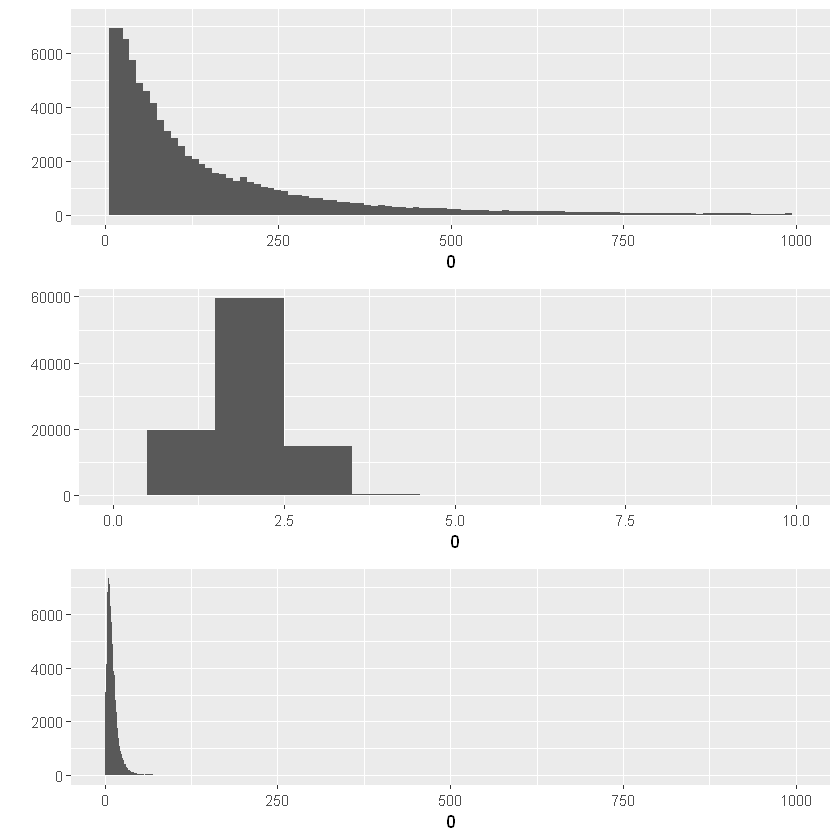

In [13]:
# using grid.arrange, we will look at 
# histograms of friend counts using different scales
g1 = qplot(x = friend_count, data = df_fb, binwidth = 10, xlim = c(0, 1000), xlab = seq(0, 1000, 50))

g2 = qplot(x = log10(friend_count + 1), data = df_fb, binwidth = 1, xlim = c(0, 10), xlab = seq(0, 10, 1))

g3 = qplot(x = sqrt(friend_count), data = df_fb, binwidth = 1, xlim = c(1, 1000), xlab = seq(0, 1000, 50))

grid.arrange(g1, g2, g3)

Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 6 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 6 row(s) containing missing values (geom_path)."


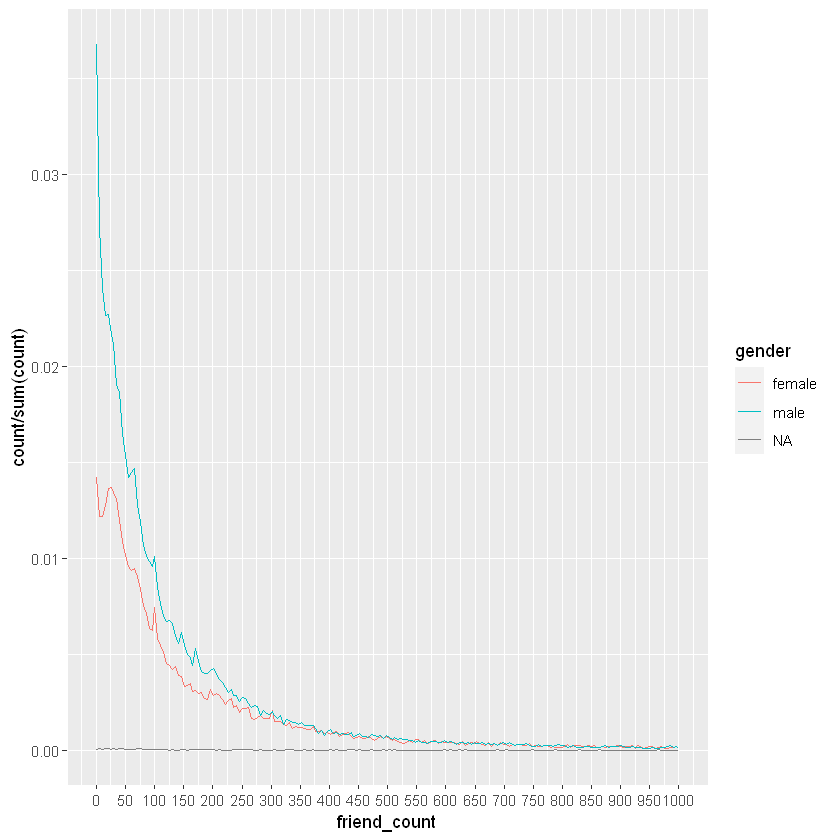

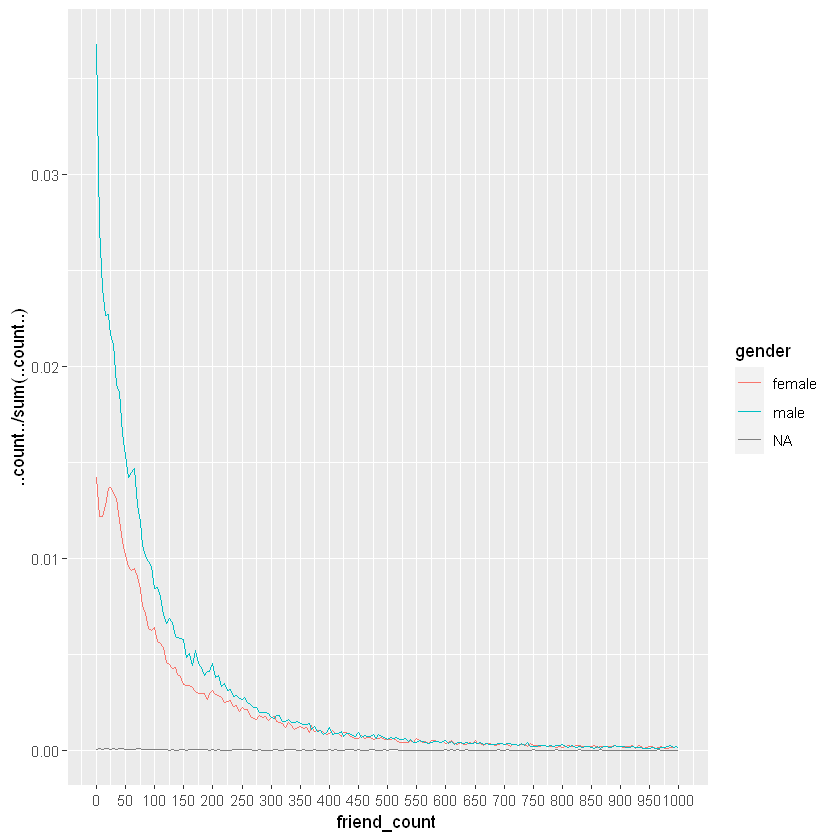

In [14]:
# histogram of friend count vs relative count, colored by gender
# my attempt with ggplot
ggplot(aes(x = friend_count, y = ..count../sum(..count..)), data = df_fb) +
    geom_freqpoly(aes(color = gender), bins = 200) +
    scale_x_continuous(limits = c(0, 1000), breaks = seq(0, 1000, 50))

# theirs
qplot(x = friend_count, y = ..count.. / sum(..count..), data = df_fb,
     binwidth = 5, geom = "freqpoly", color = gender) +
    scale_x_continuous(limits = c(0, 1000), breaks = seq(0, 1000, 50))

Warning message:
"Removed 3682 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 6 row(s) containing missing values (geom_path)."
Warning message:
"Removed 3682 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 6 row(s) containing missing values (geom_path)."


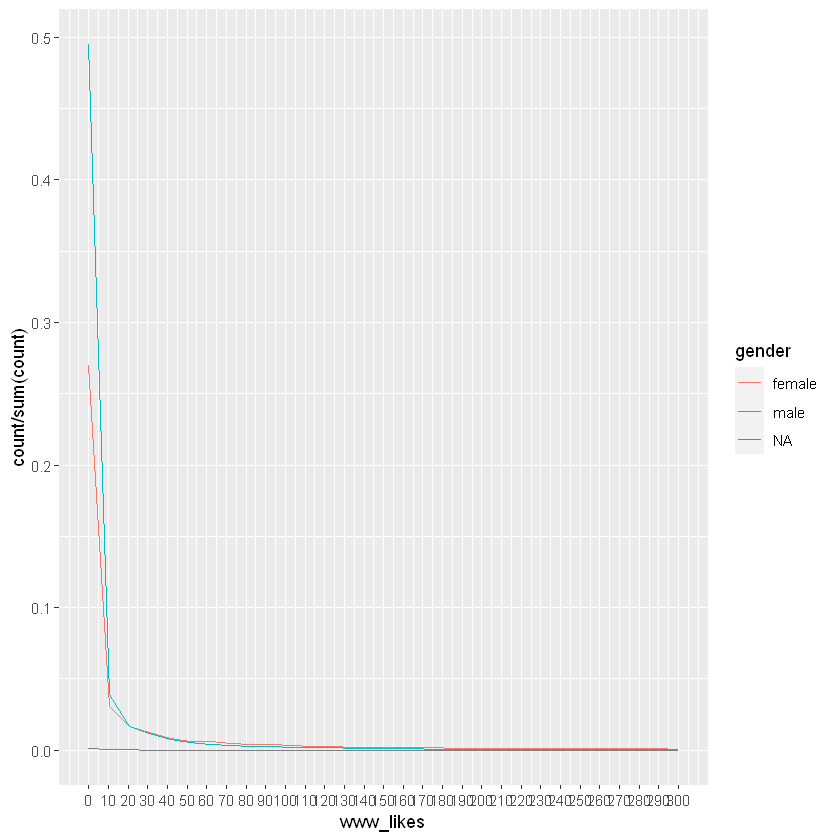

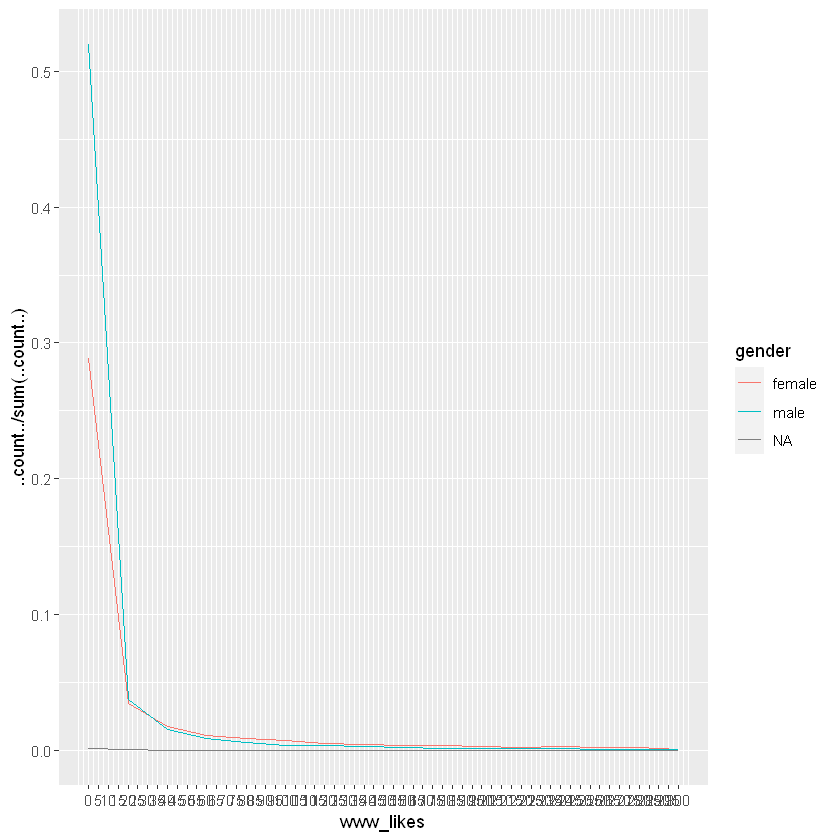

In [15]:
# relative count of www_likes, colored by gender
# my attempt
ggplot(aes(x = www_likes, y = ..count.. / sum(..count..)), data = df_fb) +
    geom_freqpoly(aes(color = gender), bins = 30) +
    scale_x_continuous(limits = c(0, 300), breaks = seq(0, 300, 10))  

# theirs
qplot(x = www_likes, y = ..count.. / sum(..count..), data = df_fb,
     binwidth = 20, geom = "freqpoly", color = gender) +
    scale_x_continuous(limits = c(0, 300), breaks = seq(0, 300, 5))

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"Transformation introduced infinite values in continuous x-axis"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 60999 rows containing non-finite values (stat_bin)."


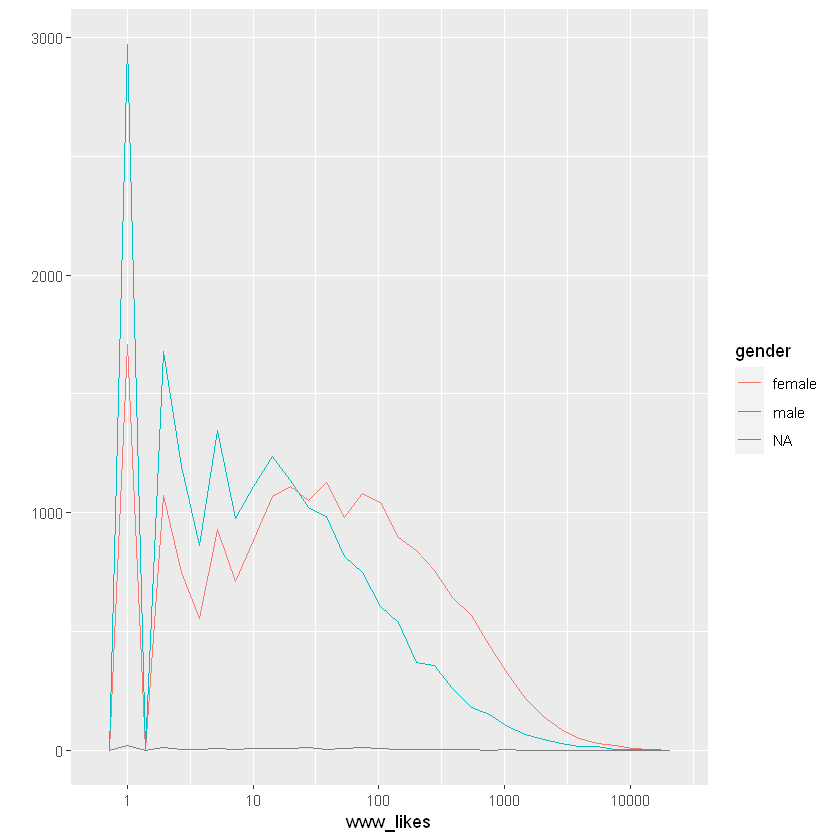

In [16]:
qplot(x = www_likes, data = df_fb, geom = "freqpoly", color = gender) +
    scale_x_continuous() +
    scale_x_log10()

In [18]:
# create subsets for males and females
df_males <- df_fb[df_fb$gender == "male",]
df_females <- df_fb[df_fb$gender == "female",]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 175 rows containing non-finite values (stat_bin)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 175 rows containing non-finite values (stat_bin)."


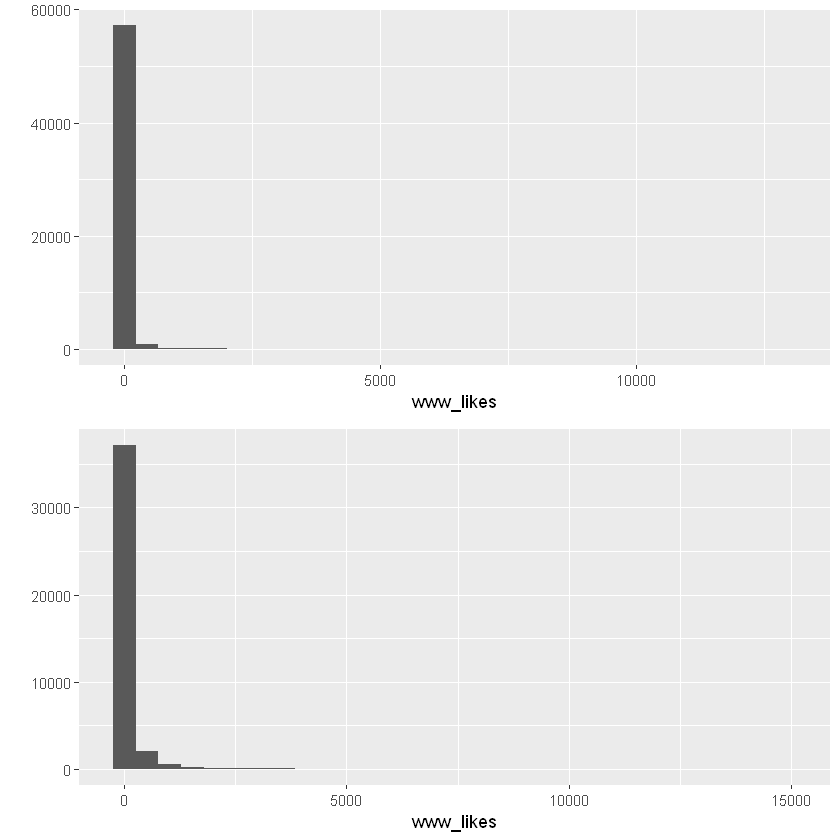

In [19]:
# male vs female- www_likes (likes received when signed in from a computer)
p1 = qplot(x = www_likes, data = df_males)
p2 = qplot(x = www_likes, data = df_females)

grid.arrange(p1, p2)

In [21]:
# not sure why the extra operations are here
male_count <- 24.42 * (nrow(df_males) - 176)
male_count
female_count <- 87.14 * (nrow(df_females) - 176)
female_count

[1] 1430353

[1] 3507646

In [22]:
# applies a function to some data frames
# in this case we are summing the www_likes by male and female
by(df_fb$www_likes, df_fb$gender, sum)

df_fb$gender: female
[1] 3507665
------------------------------------------------------------ 
df_fb$gender: male
[1] 1430175

Warning message:
"Removed 2951 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 2949 rows containing non-finite values (stat_boxplot)."


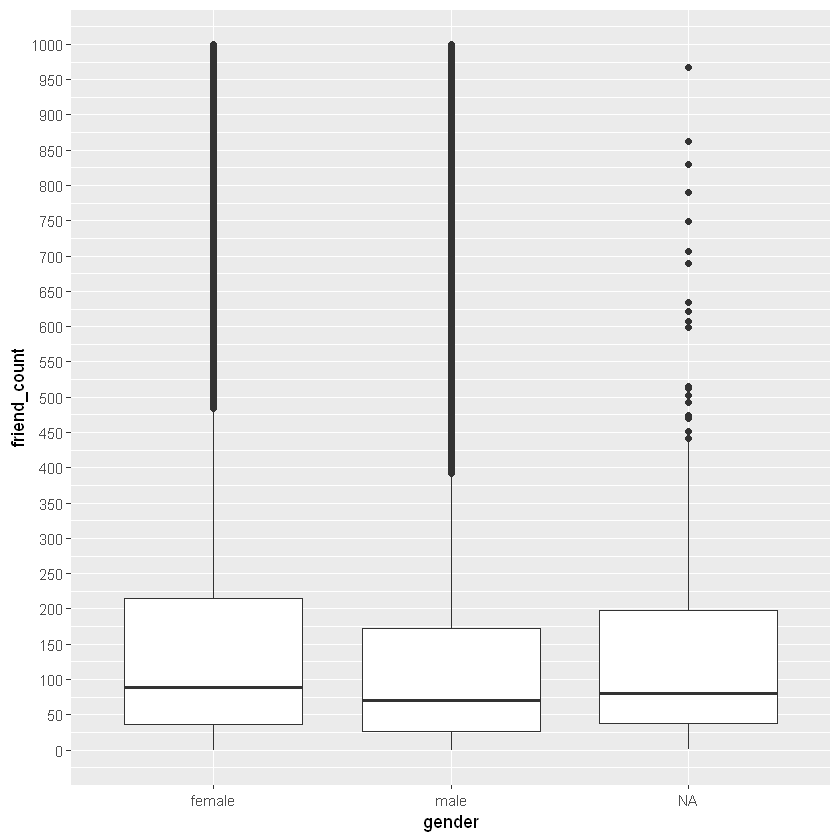

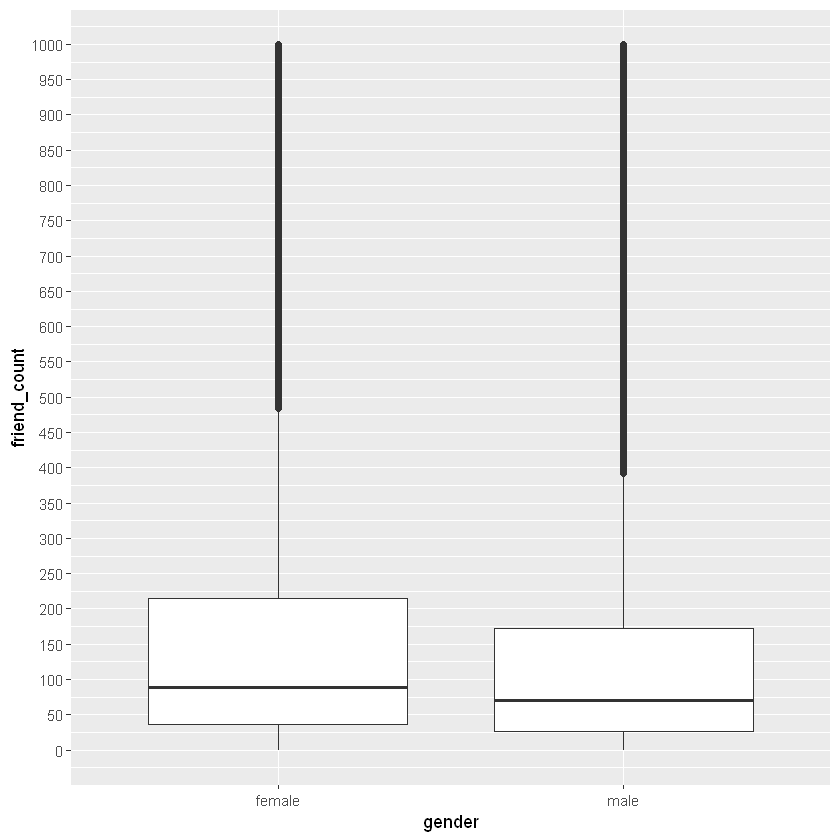

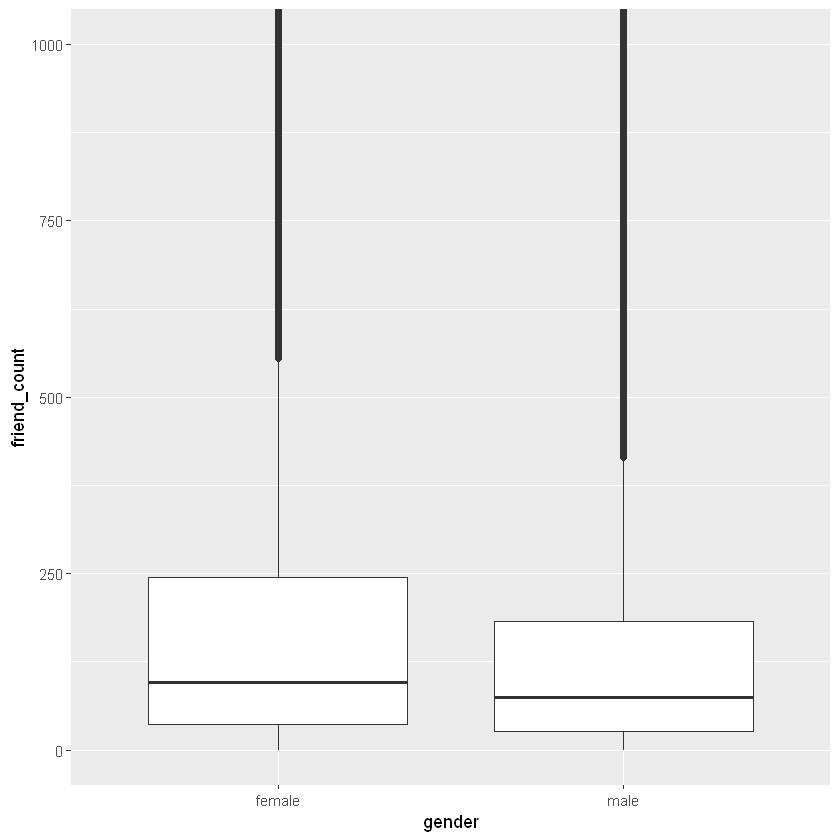

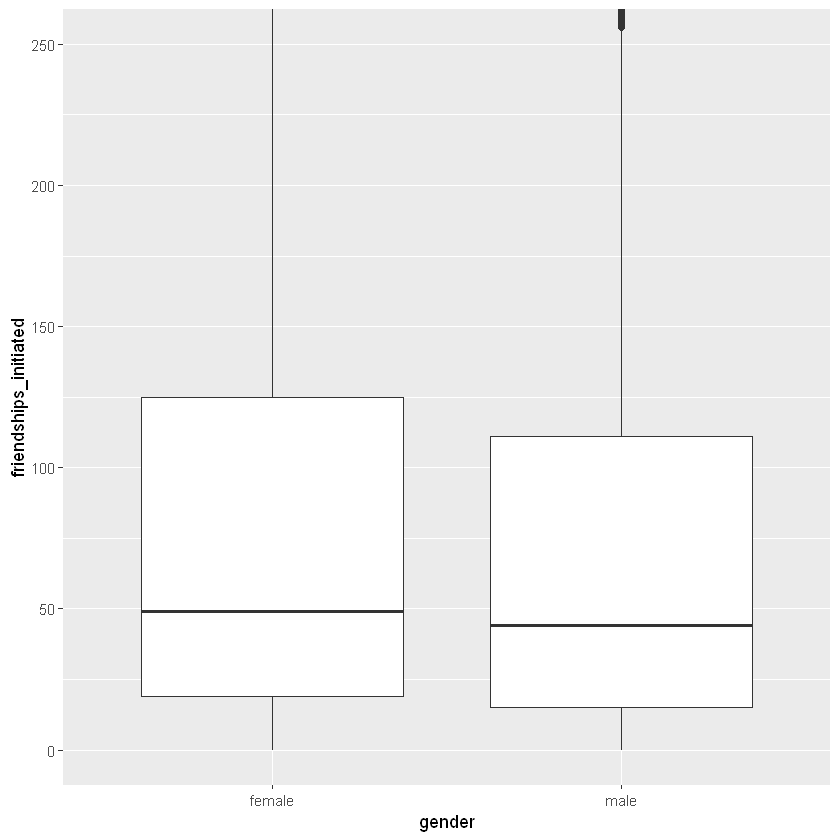

In [31]:
# various boxplots, my attempts at ggplot plus their qplot stuff

# friend count vs gender
ggplot(aes(x = gender, y = friend_count), data = df_fb) +
    geom_boxplot() +
    scale_y_continuous(limits = c(0, 1000), breaks = seq(0, 1000, 50))

# same plot but subsetting dataframe to exclude NAs
ggplot(aes(x = gender, y = friend_count), data = subset(df_fb, !is.na(gender))) +
    geom_boxplot() +
    scale_y_continuous(limits = c(0, 1000), breaks = seq(0, 1000, 50))

# same but adjusting y values 
ggplot(aes(x = gender, y = friend_count), data = subset(df_fb, !is.na(gender))) +
    geom_boxplot() +
    coord_cartesian(ylim = c(0, 1000))

# boxplot of friendships initiated by males and females
ggplot(aes(y = friendships_initiated, x = gender), data = subset(df_fb, !is.na(gender))) +
    geom_boxplot() +
    coord_cartesian(ylim = c(0, 250))

In [32]:
# by(data to look at, grouping to apply, functions to apply)
by(df_fb$friendships_initiated, df_fb$gender, summary)

df_fb$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    19.0    49.0   113.9   124.8  3654.0 
------------------------------------------------------------ 
df_fb$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    15.0    44.0   103.1   111.0  4144.0 